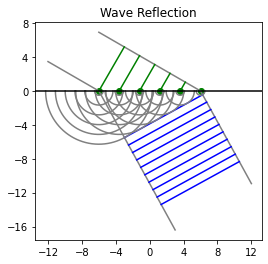

In [ ]:
# CS7GV2 Mathematics of Light and Sound
# ZHIPENG JIA
# ID 20327934
# Question 1 wavefront propagation showing refraction (Huygens-Fresnel construction)

import numpy as np
import matplotlib.pyplot as plt

refractive_index = 1.8

# calculate the foot point of perpendicular.
def get_foot_point(point_x, point_y, a, b, c):
    foot_x = (b * b * point_x - a * b * point_y - a * c) / (a * a + b * b)
    foot_y = (a * a * point_y - a * b * point_x - b * c) / (a * a + b * b)
    return foot_x, foot_y


def calculate_circle_coordinate(center_x, center_y, radius, angle):
    x = center_x + radius * np.cos(angle)
    y = center_y + radius * np.sin(angle)
    return x, y


def plot_wave_reflection(incident_angle, point_no, t, period, wavelength):

    # calculate the refraction angle
    refraction_angle = np.arcsin(np.sin(incident_angle) / refractive_index)
    refraction_angle_real = np.pi / 2 * 3 + refraction_angle

    # plot the original point
    boundary1_x = np.array([-1.0 * point_no, point_no])
    boundary1_y = np.array(np.tan(np.pi / 2 + incident_angle) * (boundary1_x - point_no))
    boundary2_x = np.array([-2 * point_no, -point_no])
    boundary2_y = np.array(np.tan(np.pi / 2 + incident_angle) * (boundary2_x + point_no))
    boundary3_x = np.array([point_no, 2 * point_no])
    boundary3_y = np.array(np.tan(refraction_angle_real) * (boundary3_x - point_no))
    boundary4_x = np.array([-point_no, 0.5 * point_no])
    boundary4_y = np.array(np.tan(refraction_angle_real) * (boundary4_x + point_no))
    plt.plot(boundary1_x, boundary1_y, color='grey')
    plt.plot(boundary2_x, boundary2_y, color='grey')
    plt.plot(boundary3_x, boundary3_y, color='grey')
    plt.plot(boundary4_x, boundary4_y, color='grey')

    r = wavelength / period * t
    x = np.linspace(-point_no, point_no, point_no)
    y = np.zeros((point_no,), dtype=int)
    plt.scatter(x, y, color="green")

    theta = np.arange(np.pi, np.pi * 2, 0.01)
    r_range = np.array([r])

    while True:
        r -= point_no * 2 / (point_no - 1) * np.cos(np.pi / 2 * 3 + refraction_angle)
        if r < 0:
            break
        r_range = np.append(r_range, r)

    boundary2_a = np.tan(np.pi / 2 + incident_angle)
    boundary2_b = -1
    boundary2_c = -np.tan(np.pi / 2 + incident_angle) * point_no
    for i in x:
        incident1x, incident1y = i, 0
        incident2x, incident2y = get_foot_point(i, 0, boundary2_a, boundary2_b, boundary2_c)
        plt.plot([incident1x, incident2x], [incident1y, incident2y], color='g')

    for i in range(10):
        reflection1x, refraction1y = calculate_circle_coordinate(-point_no, 0, r_range[0] + i, refraction_angle_real)
        reflection2x, refraction2y = calculate_circle_coordinate(point_no, 0, r_range[5] + i, refraction_angle_real)
        plt.plot([reflection1x, reflection2x], [refraction1y, refraction2y], color='b')

    r_range = r_range[::-1]

    for x1 in x:
        for r1 in r_range:
            # calculate the coordinate of the semicircle.
            point_x, point_y = calculate_circle_coordinate(x1, 0, r1, theta)
            plt.plot(point_x, point_y, "grey")
            #plt.axhline(y=r1, color="black", linestyle='-')
        r_range = r_range[:-1]
    ax = plt.gca()
    # make the horizontal axis unit length to be the same as the vertical one
    ax.set_aspect(1)
    plt.axhline(y=0, color="black", linestyle='-')
    # ax.set_ylim(bottom=0)
    ax.xaxis.set_major_locator(plt.MultipleLocator(4))
    ax.yaxis.set_major_locator(plt.MultipleLocator(4))
    plt.title("Wave Reflection")
    # plt.grid()
    plt.show()


plot_wave_reflection(np.pi / 3, 6, 2, 1, np.pi)